In [58]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [143]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:4900]
# xtest = mnist.data[4900:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [144]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50))

In [145]:
clf.fit(xtrain, ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [146]:
import matplotlib.pyplot as plt

itest = 19

#images = xtest.reshape((-1, 28, 28))
#plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
#plt.show()

found_classes = clf.predict(xtest)

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Classe : 7 / Attendu 7 OK
Classe : 5 / Attendu 5 OK
Classe : 8 / Attendu 8 OK
Classe : 0 / Attendu 5
Classe : 4 / Attendu 4 OK
Classe : 1 / Attendu 1 OK
Classe : 5 / Attendu 7
Classe : 6 / Attendu 5
Classe : 0 / Attendu 0 OK
Classe : 1 / Attendu 1 OK
Classe : 7 / Attendu 7 OK
Classe : 6 / Attendu 6 OK
Classe : 0 / Attendu 0 OK
Classe : 3 / Attendu 3 OK
Classe : 2 / Attendu 2 OK
Classe : 4 / Attendu 4 OK
Classe : 8 / Attendu 8 OK
Classe : 9 / Attendu 4
Classe : 4 / Attendu 4 OK


In [147]:
from sklearn.metrics import precision_score

print("Score clf : " + str(clf.score(xtest, ytest)))
print("Score micro : " + str(precision_score(ytest, found_classes, average="micro")))
print("Score macro : " + str(precision_score(ytest, found_classes, average="macro")))
print("Score weighted : " + str(precision_score(ytest, found_classes, average="weighted")))

Score clf : 0.878095238095238
Score micro : 0.878095238095238
Score macro : 0.8782773415790588
Score weighted : 0.8793551565507337


# Tests de précision
- 2 couches à 50 neurones
- 10 couches à 50 neurones
- 20 couches à 50 neurones
- 50 couches à 50 neurones
- 100 couches à 50 neurones

Puis faire 50 couches avec 60, 59, 58, ... neurones

Puis faire 20 couches avec 60, 57, 54, ... neurones

In [148]:
couche = (50,)
scores_couches_test = []
scores_couches_train = []

nb_couches = [1, 2, 10, 20, 50, 100]



for i in nb_couches:
    

    clf = MLPClassifier(hidden_layer_sizes=(couche*i))
    clf.fit(xtrain, ytrain)

    score_test = clf.score(xtest, ytest)
    scores_couches_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_couches_train.append(score_train)
    
    print("Couches : " + str(i) + " -> " + str(score_test))
    print("Couches : " + str(i) + " -> " + str(score_train))

    



Couches : 1 -> 0.8804761904761905
Couches : 1 -> 0.9855102040816327
Couches : 2 -> 0.8380952380952381
Couches : 2 -> 1.0
Couches : 10 -> 0.9171428571428571
Couches : 10 -> 0.996734693877551
Couches : 20 -> 0.9328571428571428
Couches : 20 -> 0.9953061224489796
Couches : 50 -> 0.09666666666666666
Couches : 50 -> 0.11653061224489795
Couches : 100 -> 0.10476190476190476
Couches : 100 -> 0.11346938775510204


Text(0.5, 1.0, 'Score pour différents nombre de couches de 50 neurones')

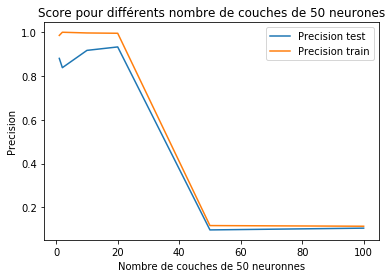

In [150]:
plt.plot([x for x in nb_couches], scores_couches_test)
plt.plot([x for x in nb_couches], scores_couches_train)

plt.legend(['Precision test', 'Precision train'], loc='upper right')
plt.xlabel("Nombre de couches de 50 neuronnes")
plt.ylabel("Precision")
plt.title("Score pour différents nombre de couches de 50 neurones")

On voit sur notre graphique que la précision pour les données d'entrainement diminue également. cela signifie que notre algoritme n'arrive pas à généraliser notre modèle
# Overfitting
L'algorithme est tellement bien entrainé avec toutes les valeurs dont il dispose en train qui fait de mauvaises prédictions. Exemple avec la droite



Calculer la précision pour 50 couches de 60, puis 59, puis 58, ... neurones.

In [151]:
couches = (60,)
for i in range(59 , 10, -1):
    couches = couches + (i,)
    
print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))
clf.fit(xtrain, ytrain)


(60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50,
                                  49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
                                  38, 37, 36, 35, 34, 33, 32, 31, ...),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [152]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print(score_test)
print(score_train)

0.6752380952380952
0.7391836734693877


Calculer la précision pour 20 couches de 60, puis 57, puis 54, ... neurones.

In [153]:
couches = (60,)
for i in range(57 , 0, -3):
    couches = couches + (i,)
    
print(couches)


clf = MLPClassifier(hidden_layer_sizes=(couches))
clf.fit(xtrain, ytrain)


(60, 57, 54, 51, 48, 45, 42, 39, 36, 33, 30, 27, 24, 21, 18, 15, 12, 9, 6, 3)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 57, 54, 51, 48, 45, 42, 39, 36, 33, 30,
                                  27, 24, 21, 18, 15, 12, 9, 6, 3),
              learning_rate='constant', learning_rate_init=0.001, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [154]:
score_test = clf.score(xtest, ytest)
score_train = clf.score(xtrain, ytrain)
print(score_test)
print(score_train)

0.8195238095238095
0.8859183673469387
